# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import geopandas as gpd
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [30]:
# Import "Geo.json" file for Europe 
geo_data = r'europe-outline_with_countries_223.geojson'


In [31]:
print (geo_data)

europe-outline_with_countries_223.geojson


In [4]:
# set path
path =r'/Users/juliapetke/Desktop/Julia Petke- Boat Sale'


In [5]:
# Import Data
boat = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Boat Sale_data_cleaned.csv'), index_col = False)

In [6]:
boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
0,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
3,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


## 2. Data Wrangling 

In [7]:

# Automatically fix encoding issues with 'Location'
boat['Location'] = boat['Location'].apply(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='replace'))

# Now split 'Location' into 'Country' and 'State'
# Use 'n=1' to limit to two parts only (Country and State)
location_split = boat['Location'].str.split(' » ', n=1, expand=True)

# Create a new column called 'Country' and assign the first part of the split
boat['Country'] = location_split[0]

# Display the updated DataFrame with the new 'Country' column
print(boat[['Location', 'Country']])

                                        Location      Country
0                         Germany » Bönningstedt      Germany
1                     Germany » Bayern » München      Germany
2                          Switzerland » Seengen  Switzerland
3     Italy » Lake Garda » Moniga del Garda (BS)        Italy
4               Switzerland » Zugersee » Neuheim  Switzerland
...                                          ...          ...
6584                Switzerland » Rhein » Möhlin  Switzerland
6585         Switzerland » Lake of Zurich » Rafz  Switzerland
6586       Switzerland » Bielersee » Gerolfingen  Switzerland
6587       Germany » Nordrhein-Westfalen » Wesel      Germany
6588          Switzerland » Brienzersee » Brienz  Switzerland

[6589 rows x 2 columns]


In [8]:
boat.shape

(6589, 9)

In [9]:
boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days,Country
0,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany » Bönningstedt,75,Germany
1,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany » Bayern » München,58,Germany
2,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland » Seengen,239,Switzerland
3,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy » Lake Garda » Moniga del Garda (BS),69,Italy
4,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland » Zugersee » Neuheim,113,Switzerland


In [10]:
# select only needed columns
columns = ["Price","Boat Type","Manufacturer","Year Built","Number of views last 7 days","Country"]

In [11]:
# Create a subset
Country_rec = boat [columns]

In [12]:
Country_rec.head()

,Price,Boat Type,Manufacturer,Year Built,Number of views last 7 days,Country
0,EUR 3490,Center console boat,Terhi power boats,2020,75,Germany
1,EUR 3399,Fishing Boat,Linder power boats,2019,58,Germany
2,CHF 3500,Fishing Boat,Terhi power boats,1987,239,Switzerland
3,EUR 3500,Sport Boat,GS Nautica power boats,2004,69,Italy
4,CHF 4600,Runabout,Kimple power boats,2020,113,Switzerland


In [13]:
# Check for missing values
Country_rec.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Year Built                     0
Number of views last 7 days    0
Country                        0
dtype: int64

In [14]:
##Find the Best Manufacturer per country (Based on Views)
# Group by Country and Manufacturer, then sum the views
grouped = boat.groupby(['Country', 'Manufacturer'])['Number of views last 7 days'].sum().reset_index()

# Find the best manufacturer per country based on views
best_manufacturer = grouped.loc[grouped.groupby('Country')['Number of views last 7 days'].idxmax()]

# Display the result
print(best_manufacturer) 

                       Country               Manufacturer  \
0            24782 Büdelsdorf          Nimbus power boats   
1                        Adria       Princess power boats   
2                      Angera        Glastron power boats   
3                    Australia      Sunseeker power boats   
38                     Austria      Sunseeker power boats   
...                        ...                        ...   
1767  Zürichse, 8855 Wangen SZ         Malibu power boats   
1768                    annecy  Correct Craft power boats   
1769               baden baden          Maxum power boats   
1770                  bodensee      Crownline power boats   
1771                   espa?a       Menorquin power boats   

      Number of views last 7 days  
0                             413  
1                              75  
2                             455  
3                             150  
38                           1813  
...                           ...  
1767           

In [15]:
import matplotlib.pyplot as plt

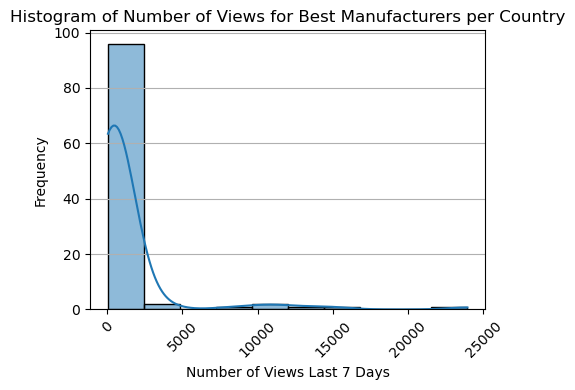

In [16]:
# Create a histogram of the number of views for the best manufacturers
plt.figure(figsize=(5, 4))
sns.histplot(data=best_manufacturer, x='Number of views last 7 days', bins=10, kde=True)

# Step 4: Customize the plot
plt.title('Histogram of Number of Views for Best Manufacturers per Country')
plt.xlabel('Number of Views Last 7 Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
#Find the best manufacturer per country based on views
best_manufacturer = grouped.loc[grouped.groupby('Country')['Number of views last 7 days'].idxmax()]

In [18]:
#Prepare the data for folium (ensure names match)
data_to_plot = best_manufacturer[['Country', 'Number of views last 7 days']]

In [19]:
# Create a map centered on the world
map = folium.Map(location=[20, 0], zoom_start=2)


#### 4. Plotting a choropleth

In [32]:
import folium

# Assuming map is already created
# map = folium.Map(location=[latitude, longitude], zoom_start=zoom_level)

# Add choropleth layer
folium.Choropleth(
    geo_data=geo_data,  # GeoJSON with country geometries or path to the GeoJSON file
    data=data_to_plot,     # Data to plot (e.g., Pandas DataFrame)
    columns=['Country', 'Number of views last 7 days'],  # Columns in the DataFrame
    key_on='feature.properties.name',  # Matches the GeoJSON property
    fill_color='YlOrBr',               # Color scheme
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of views (Last 7 Days)'
).add_to(map)

# Display map 
map